In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/120-years-of-olympic-history/noc_regions.csv
/kaggle/input/120-years-of-olympic-history/athlete_events_data_dictionary.csv
/kaggle/input/120-years-of-olympic-history/country_definitions.csv
/kaggle/input/120-years-of-olympic-history/athlete_events.csv
/kaggle/input/120-years-of-olympic-history/country_definitions_data_dictionary.csv


Dataset loaded successfully! 🚀


/tmp/ipykernel_24/4020345180.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medals['Year'] = df_medals['Year'].astype(int)


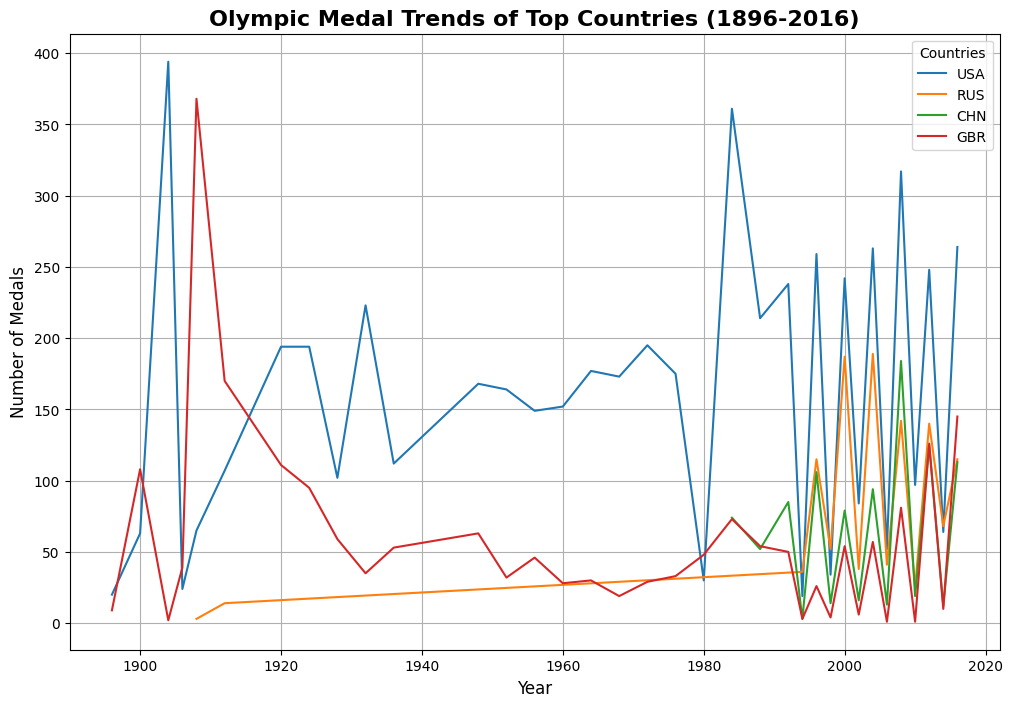

🏅 Top 5 Medal-Winning Countries of All Time:
NOC
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: count, dtype: int64


In [ ]:

# Let's dive into the glorious world of Olympic data analysis!
# Because who doesn't love some international drama and sportsmanship? 😎

# Step 1: Import the libraries of awesomeness
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset (assuming the file is named 'athlete_events.csv')
# This dataset is from Kaggle's "120 Years of Olympic History"

try:
    # Behold the magic of data loading!
    df = pd.read_csv('/kaggle/input/120-years-of-olympic-history/athlete_events.csv')
    print("Dataset loaded successfully! 🚀")
    
    # Step 3: Clean the dataset because messy data is like a tangled headphone cable 🎧
    # Drop any rows where medal info is missing (we only care about medal winners here)
    df_medals = df.dropna(subset=['Medal'])

    # Convert the "Year" column to integers, just in case it's acting funny
    df_medals['Year'] = df_medals['Year'].astype(int)

    # Step 4: Group data by country and year to see the medal trends
    # Aggregating the total medals won per year for each country
    medal_trends = df_medals.groupby(['Year', 'NOC'])['Medal'].count().reset_index()

    # Step 5: Visualization of medal trends (the exciting part 🎨)
    plt.figure(figsize=(12, 8))

    # Let's pick a few countries to visualize (USA, RUS, CHN, and GBR because, you know, competition 😅)
    top_countries = ['USA', 'RUS', 'CHN', 'GBR']
    for country in top_countries:
        country_data = medal_trends[medal_trends['NOC'] == country]
        plt.plot(country_data['Year'], country_data['Medal'], label=country)

    # Add some pizzazz to the plot
    plt.title('Olympic Medal Trends of Top Countries (1896-2016)', fontsize=16, fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Medals', fontsize=12)
    plt.legend(title='Countries')
    plt.grid(True)

    # Save the plot to impress your boss, professor, or just yourself
    plt.savefig('olympic_medal_trends.png')
    plt.show()

    # Step 6: Quirky insights (optional but fun)
    # Let's find the top 5 countries with the most medals ever
    top_5_countries = df_medals['NOC'].value_counts().head(5)
    print("🏅 Top 5 Medal-Winning Countries of All Time:")
    print(top_5_countries)

    # Finally, remember to hydrate! This analysis was intense. 💧

except FileNotFoundError:
    print("Oops! File not found. Make sure 'athlete_events.csv' is in the directory.")
except pd.errors.EmptyDataError:
    print("The file is empty. Please check the file content.")
except pd.errors.ParserError:
    print("There was an error parsing the CSV. Check the file format.")
except Exception as e:
    print("An unexpected error occurred: {e}")